# Import Modules

In [1]:
#Start with importing the required modules
import scipy.stats as stats #scipy statistical functions
import matplotlib.pyplot as plt #for making plots
import numpy as np #numerical python, to do many mathematical operations and importing data

# Import the Data from a file

In [22]:
#example data set, physical activity of children from different ages (11, 13, 145 years old)
physical_activity = np.genfromtxt('/home/amr/physical_activity.csv', delimiter=',') #import the data, you can import any format

In [23]:
y_11 = physical_activity[1:,0] #extract the first column without the name of the column
#notice that python is zero idexed i.e the counting starts from 0 not from 1 like matlab
print(y_11) #you cannot start a variable name with a no. that's why y_11 noy 11y

[ 16.  19.  30.  19.  36.  29.  29.  28.  41.  39.  35.  24.  17.  22.   8.
  25.  28.  17.  23.  32.  26.  18.  25.  35.  24.  44.  32.  30.  46.  38.
  39.  28.  25.  31.  11.  29.  19.  19.  44.]


In [24]:
y_13 = physical_activity[1:,1] #extract the second column without the name of the column
print(y_13)

[ 24.  38.  44.  34.  57.  50.  56.  53.  66.  66.  55.  43.  44.  43.  16.
  47.  55.  31.  46.  55.  44.  45.  46.  64.  57.  56.  54.  41.  53.  61.
  61.  50.  42.  58.  30.  37.  27.  39.  66.]


In [25]:
y_15 = physical_activity[1:,2] #extract the third column without the name of the column
print(y_15)

[ 34.  56.  53.  39.  61.  61.  70.  66.  75.  76.  60.  52.  58.  49.  28.
  53.  75.  33.  57.  64.  57.  55.  60.  75.  81.  66.  51.  55.  65.  67.
  70.  58.  56.  69.  45.  33.  37.  43.  68.]


In [42]:
physical_activity.shape #you can check the length of your data, 40 rows(legend + 39 value) and 3 columns

(40, 3)

# Check for Normality

In [31]:
#since ANOVA is a parametric test, to be able to use it properly, you have to check first that the values in each
#group are following a normal distribution
#there are many tests to check for this, we are going to use D'Agostino and Pearson's 
#as implemented in scipy.stats.normaltest
#there is another test implemented also in scipy called Shapiro-Wilk test, (scipy.stats.shapiro)
#the logic is the same, the data is following a normal distribuiton if the result of the test is NOT significant (p>0.05)
stats.normaltest(y_11)

NormaltestResult(statistic=0.26939627903776825, pvalue=0.87397969180388857)

In [29]:
stats.normaltest(y_13)

NormaltestResult(statistic=2.2216071068080154, pvalue=0.32929424921949585)

In [30]:
stats.normaltest(y_15)

NormaltestResult(statistic=1.6772783659653556, pvalue=0.43229840236302719)

In [32]:
#you can compare the results with Shapiro-Wilk test also 
stats.shapiro(y_11) #the result should be fairly close

(0.9832028746604919, 0.8163239359855652)

# Check for equal STDV

In [37]:
#Now,we are going to use ANOVA to test if there is any significant test between the three groups
#to be able to use ANOVA properly, our data should check three requirements
#1- the samples are independent -> check
#2- withdrawn from normal distribution -> check
#3- equal standard deviations, we are going to calculate now
stdv_y_11 = np.std(y_11)
print('Standard deviation of 11 years old is: %f'%stdv_y_11)

stdv_y_13 = np.std(y_13)
print('Standard deviation of 13 years old is: %f'%stdv_y_13)

stdv_y_15 = np.std(y_15)
print('Standard deviation of 15 years old is: %f'%stdv_y_15)

Standard deviation of 11 years old is: 9.030302
Standard deviation of 13 years old is: 11.920347
Standard deviation of 15 years old is: 13.097621


# Perfrom the actual test 

In [83]:
#now, the actual test
#notice that we are using one-way anova because we have only one variable (i.e physical activity)
#running the test will give you 2 values:
#f-stat and p-value
[anova_f_stat, anova_p_value] = stats.f_oneway(y_11, y_13, y_15)

print('F-stat for anova test: %f'%anova_f_stat) 
print('p_value for anova test: %0.025f'%anova_p_value) #0.025f just formatting the output to see from all the zeros

F-stat for anova test: 65.305755
p_value for anova test: 0.0000000000000000001260068


In [52]:
#as you see, there is a huge significance
#but anova is non-directional test, it will tell you there is a difference between your groups, but not where exactly
#you have to use something like Tukey or Bonferoni

# Plot your data

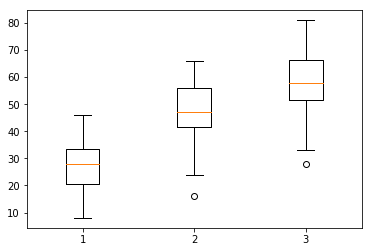

In [82]:
plt.boxplot(physical_activity[1:,:]);# A very simple way to plot the data, you can change almost everything and 
#customize your graph as much as you want 
